In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

# Now, load the dataset from the current directory
file_path = 'Figure_5_data.csv'  # File name without full path as we're already in the correct directory
df = pd.read_csv(file_path)


In [5]:

# Filter out unwanted groups and create a copy to avoid SettingWithCopyWarning
df_filtered = df[~df['ecosystem_group'].isin(["Uncategorized", "Microbial-associated"])].copy()


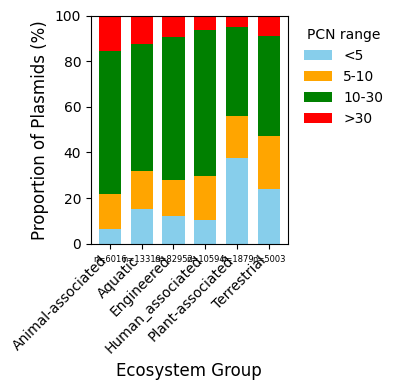

In [18]:
# Define the PCN ranges
bins = [0, 5, 10, 30, float('inf')]
labels = ['<5', '5-10', '10-30', '>30']

# Create a new column for the PCN range
df_filtered['PCN_range'] = pd.cut(df_filtered['PCN'], bins=bins, labels=labels, right=False)

# Group by ecosystem and PCN range, and calculate the proportion
grouped = df_filtered.groupby(['ecosystem_group', 'PCN_range'], observed=False).size().unstack(fill_value=0)

# Normalize by the total number of plasmids in each ecosystem (proportion)
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Calculate the total number of plasmids for each ecosystem group
ecosystem_counts = df_filtered['ecosystem_group'].value_counts()

# Set up the plot
plt.figure(figsize=(4, 4))  # Adjusted figure size
ax = plt.gca()

# Define colors for each PCN range
color_map = {
    '<5': 'skyblue',
    '5-10': 'orange',
    '10-30': 'green',
    '>30': 'red'
}

# Plot the stacked bar chart with wider bars
grouped.plot(kind='bar', stacked=True, 
             color=[color_map[label] for label in grouped.columns],
             width=0.7, ax=ax)

# Annotate each ecosystem with the n= value below the bars
for i, ecosystem in enumerate(grouped.index):
    n_plasmids = ecosystem_counts[ecosystem]  # Get the total number of plasmids for the ecosystem
    ax.text(i, -5, f'n={n_plasmids}', ha='center', va='top', fontsize=6, color='black')

# Customize the plot
ax.set_xlabel('Ecosystem Group', fontsize=12)
ax.set_ylabel('Proportion of Plasmids (%)', fontsize=12)
ax.set_ylim(0, 100)

# Improve legend
legend = ax.legend(title='PCN range', 
                  labels=['<5', '5-10', '10-30', '>30'], 
                  bbox_to_anchor=(1.02, 1), 
                  loc='upper left',
                  frameon=False)

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the high-quality plot
plt.savefig('5_A.pdf', dpi=1200, format='pdf', bbox_inches='tight')
plt.savefig('5_A.svg', dpi=1200, format='svg', bbox_inches='tight')

# Show the plot
plt.show()
